<a href="https://colab.research.google.com/github/Josepholaidepetro/Umojahack/blob/main/models/FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
!pip install lasio

In [ ]:
from google.colab import files
files.upload()

Saving formation_eval.py to formation_eval.py


{'formation_eval.py': b'"""\r\nformation evaluation\r\nAuthor: Olaide Joseph\r\nEmail: Josepholaide10@gmail.com\r\n"""\r\n\r\nimport lasio\r\nimport numpy as np\r\nimport matplotlib.pyplot as plt\r\nimport pandas as pd\r\nimport matplotlib.ticker as ticker\r\nimport warnings\r\nplt.style.use(\'ggplot\')\r\nwarnings.filterwarnings("ignore")\r\n\r\n\r\nclass formation_eval:\r\n    """\r\n        Evaluates the formation and determines formation characteristic such as shale volume,\r\n        reservoir and non-reservoir zones.\r\n        args::\r\n            datapath: LAS datapath\r\n            mnemonics: list of well log mnemonics, if \'None\', density, neutron, Gamma ray, SP and resistivity\r\n            logs are passed if available.\r\n        """\r\n\r\n    def __init__(self, datapath: str = None, mnemonics: list = None):\r\n        """\r\n\r\n        :type datapath: str\r\n        :type mnemonics: list\r\n\r\n        """\r\n        if mnemonics is None:\r\n            self.mnemonic

In [ ]:
import sys
import os
import lasio
import warnings

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
import seaborn as sns
sns.set_style('darkgrid')
sys.path.append('/content/formation_eval.py')
warnings.filterwarnings("ignore")
%matplotlib inline

# File Path

In [ ]:
def get_file(path):
  files=os.listdir(path)
  train_files = sorted([os.path.join(path, f) for f in files])
  return train_files

train_dir = '/content/drive/MyDrive/volve_15_9-F'
train_files = get_file(train_dir)

In [ ]:
def to_dataframe(files):
  df_well = []
  df_keys = []
  df_cuvs = []
  for file in files:
      df = lasio.read(file)
      df_keys.append(df.keys())
      df_cuvs.append(df.curves)
      well = df.df()
      well.reset_index(inplace=True)
      df_well.append(well)
  return df_well, df_keys, df_cuvs


df_well, df_keys, df_cuvs = to_dataframe(train_files) 

well1, well2, well3, well4, well5 = df_well

# Dataframe keys and curves

In [ ]:
for i in df_keys:
  print(i)

['DEPTH', 'ABDCQF01', 'ABDCQF02', 'ABDCQF03', 'ABDCQF04', 'BS', 'CALI', 'DRHO', 'DT', 'DTS', 'GR', 'NPHI', 'PEF', 'RACEHM', 'RACELM', 'RD', 'RHOB', 'RM', 'ROP', 'RPCEHM', 'RPCELM', 'RT']
['DEPTH', 'ABDCQF01', 'ABDCQF02', 'ABDCQF03', 'ABDCQF04', 'BS', 'CALI', 'DRHO', 'GR', 'NPHI', 'PEF', 'RACEHM', 'RACELM', 'RD', 'RHOB', 'RM', 'ROP', 'RPCEHM', 'RPCELM', 'RT']
['DEPTH', 'ABDCQF01', 'ABDCQF02', 'ABDCQF03', 'ABDCQF04', 'BS', 'CALI', 'DRHO', 'DT', 'DTS', 'GR', 'NPHI', 'PEF', 'RACEHM', 'RACELM', 'RHOB', 'ROP', 'RPCEHM', 'RPCELM', 'RT']
['DEPTH', 'ABDCQF01', 'ABDCQF02', 'ABDCQF03', 'ABDCQF04', 'BS', 'CALI', 'DRHO', 'DT', 'DTS', 'GR', 'NBGRCFM', 'NPHI', 'PEF', 'RACEHM', 'RACELM', 'RD', 'RHOB', 'RM', 'ROP', 'RPCEHM', 'RPCELM', 'RT']
['DEPTH', 'ABDCQF01', 'ABDCQF02', 'ABDCQF03', 'ABDCQF04', 'BS', 'CALI', 'DRHO', 'GR', 'NBGRCFM', 'NPHI', 'PEF', 'RACEHM', 'RACELM', 'RD', 'RHOB', 'RM', 'ROP', 'RPCEHM', 'RPCELM', 'RT']


In [ ]:
df_cuvs[0]

[CurveItem(mnemonic="DEPTH", unit="M", value="00 001 00 00", descr="0  Depth", original_mnemonic="DEPTH", data.shape=(35735,)),
 CurveItem(mnemonic="ABDCQF01", unit="g/cm3", value="00 000 00 00:   1  ABDCQF01:COMPOSITE:rC:NONE", descr="v1", original_mnemonic="ABDCQF01", data.shape=(35735,)),
 CurveItem(mnemonic="ABDCQF02", unit="g/cm3", value="00 000 00 00:   2  ABDCQF02:COMPOSITE:rC:NONE", descr="v1", original_mnemonic="ABDCQF02", data.shape=(35735,)),
 CurveItem(mnemonic="ABDCQF03", unit="g/cm3", value="00 000 00 00:   3  ABDCQF03:COMPOSITE:rC:NONE", descr="v1", original_mnemonic="ABDCQF03", data.shape=(35735,)),
 CurveItem(mnemonic="ABDCQF04", unit="g/cm3", value="00 000 00 00:   4  ABDCQF04:COMPOSITE:rC:NONE", descr="v1", original_mnemonic="ABDCQF04", data.shape=(35735,)),
 CurveItem(mnemonic="BS", unit="inches", value="00 000 00 00:   5  BS:COMPOSITE:rC:NONE", descr="v1", original_mnemonic="BS", data.shape=(35735,)),
 CurveItem(mnemonic="CALI", unit="inches", value="70 280 00 01: 

# Importing Formation Evaluation Module

In [ ]:
from formation_eval import formation_eval
formation_eval1 = formation_eval(datapath=None, mnemonics=None)

The module takes a particular amount of logs for evaluation, usually the important ones

In [ ]:
df_well1 = []
for i in range(len(df_well)):
    df = formation_eval1.well_logs(dataframe=df_well[i])
    df_well1.append(df)
    
well1, well2, well3, well4, well5 = df_well1

In [ ]:
for i in range(len(df_well1)):
  print('well' + str(i))
  print(df_well1[i].isnull().sum())
  print('\n')

well0
DEPTH        0
ROP        386
GR         144
CALI     24054
BS           0
RD         570
RT         570
RM         570
NPHI     24138
RHOB     24110
DRHO     24047
DT       24260
PEF      24110
dtype: int64


well1
DEPTH        0
ROP        407
GR         147
CALI     30275
BS           0
RD         961
RT         744
RM         744
NPHI     30352
RHOB     30326
DRHO     30280
PEF      30326
dtype: int64


well2
DEPTH        0
ROP        884
GR         690
CALI     24616
BS           0
RT        1150
NPHI     24837
RHOB     24810
DRHO     24714
DT       25137
PEF      24810
dtype: int64


well3
DEPTH        0
ROP        807
GR         693
CALI     29672
BS           0
RD        1281
RT       24653
RM        1281
NPHI     29778
RHOB     29750
DRHO     29665
DT       28929
PEF      29750
dtype: int64


well4
DEPTH        0
ROP        805
GR         646
CALI     29256
BS           0
RD        1356
RT        1332
RM        1332
NPHI     29378
RHOB     29352
DRHO     29258
PEF      2

In [ ]:
for i in range(len(df_well1)):
  print('well' + str(i))
  print(df_well1[i].shape)
  print('\n')

well0
(35735, 13)


well1
(45818, 12)


well2
(35361, 11)


well3
(33191, 13)


well4
(39481, 12)




In [ ]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value not in lst2] 
    return lst3 

intersection(df_keys[3], df_keys[2]), intersection(df_keys[0], df_keys[2]) 

(['NBGRCFM', 'RD', 'RM'], ['RD', 'RM'])

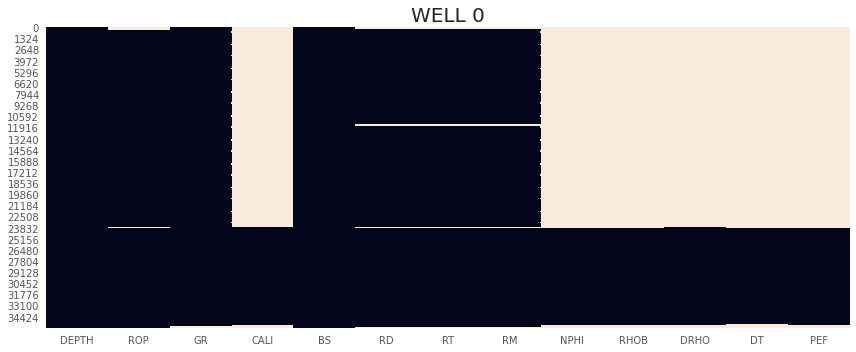

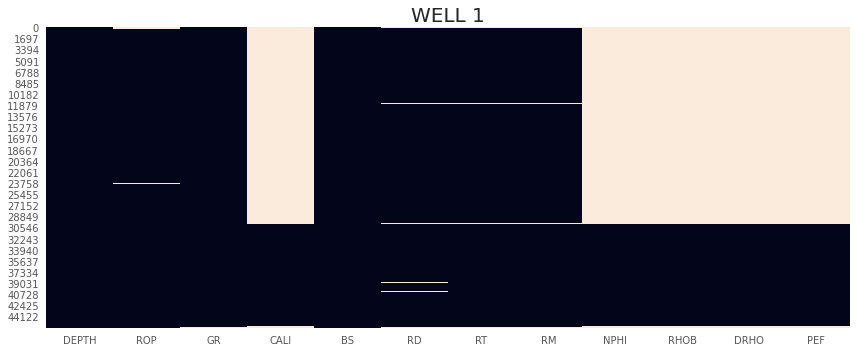

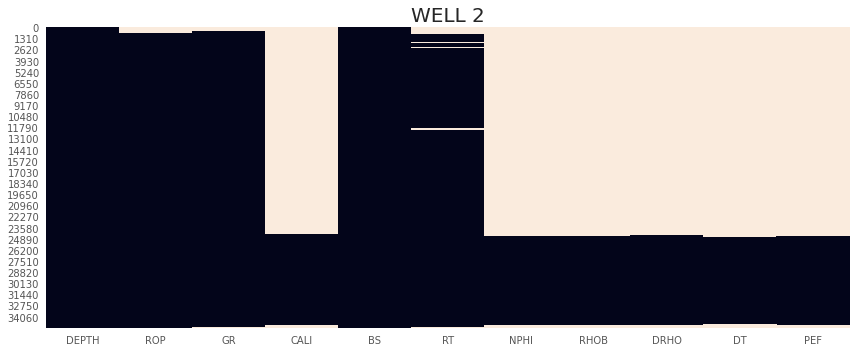

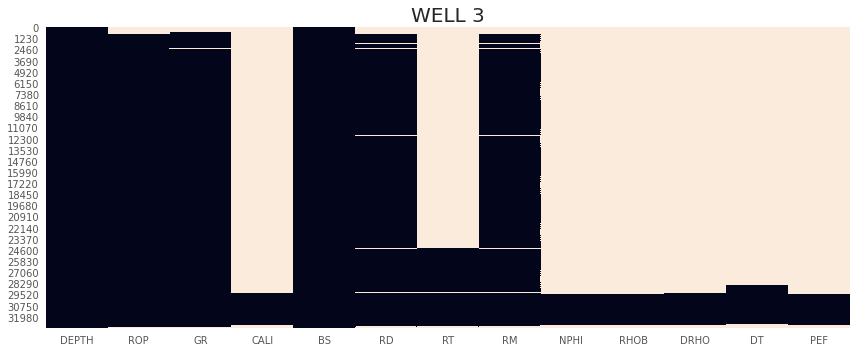

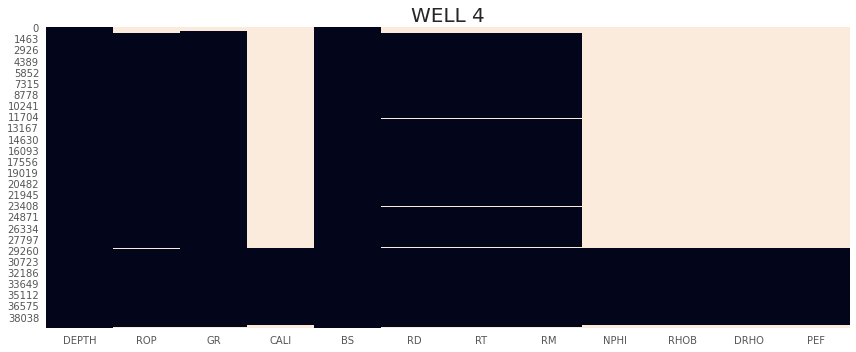

In [ ]:
for i in range(len(df_well)):
  plt.figure(figsize=(12,5))
  sns.heatmap(df_well1[i].isnull(), cbar=False)
  plt.title("WELL {}".format(i), size=20)
  plt.tight_layout()
  plt.show()

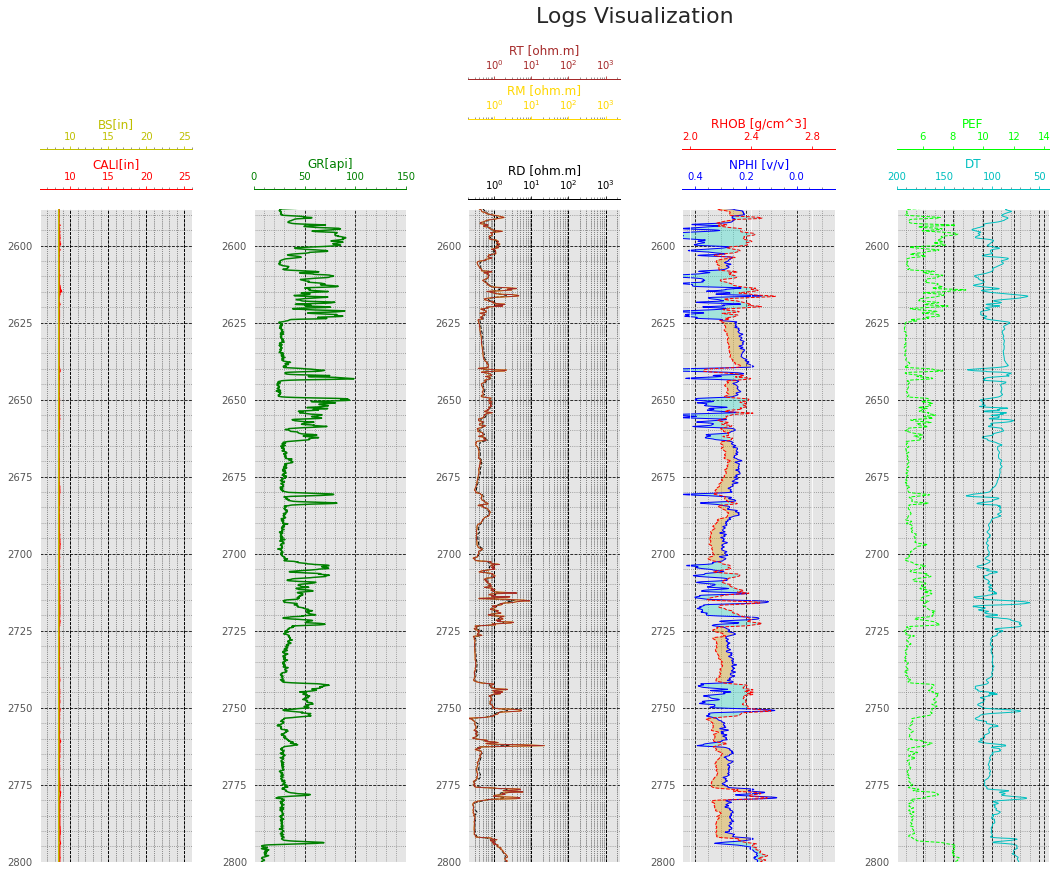

In [ ]:
formation_eval1.log_viz(well1,2588, 2800, plotsize=(18,12))
plt.savefig('preddt2')

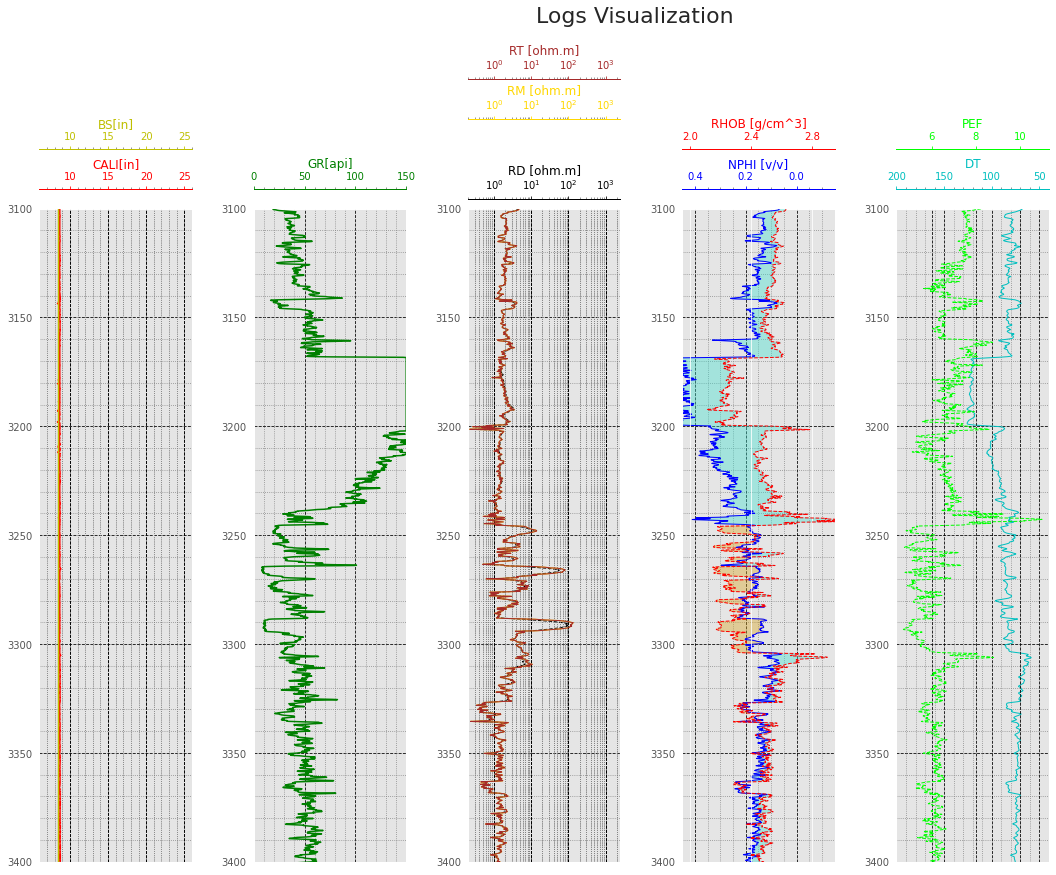

In [ ]:
formation_eval1.log_viz(well4,3100, 3400, plotsize=(18,12))

# Data Science & Machine Learning around the Sonic Log

For training:

    rows w/o Nan value
    well1: 24000:34000
    well4: 29800:32700

For prediction:

    rows w/o Nan value
    well3: 25000:34000
    

 


In [ ]:
# the train data
well1_new = well1.iloc[24000:34000]
well4_new = well4.iloc[29800:32700]
#well5_new = well5.iloc[30000:38500]
#well2_new = well2.iloc[31000:44000]

# the test data
well3_new = well3.iloc[25000:34000]

In [ ]:
len(well1_new), len(well3_new), len(well4_new)

(10000, 9000, 2900)

In [ ]:
intersection(df_keys[3], df_keys[0]), intersection(df_keys[0], df_keys[2]), intersection(df_keys[3], df_keys[2]) 

(['NBGRCFM'], ['RD', 'RM'], ['NBGRCFM', 'RD', 'RM'])

In [ ]:
well1_new['label'] = 0
well4_new['label'] = 1

In [ ]:
train_df =well1_new.append(well4_new)
test_df = well3_new.copy()

In [ ]:
train_df.isna().sum()

DEPTH    0
ROP      0
GR       0
CALI     0
BS       0
RD       0
RT       0
RM       0
NPHI     0
RHOB     0
DRHO     0
DT       0
PEF      0
label    0
dtype: int64

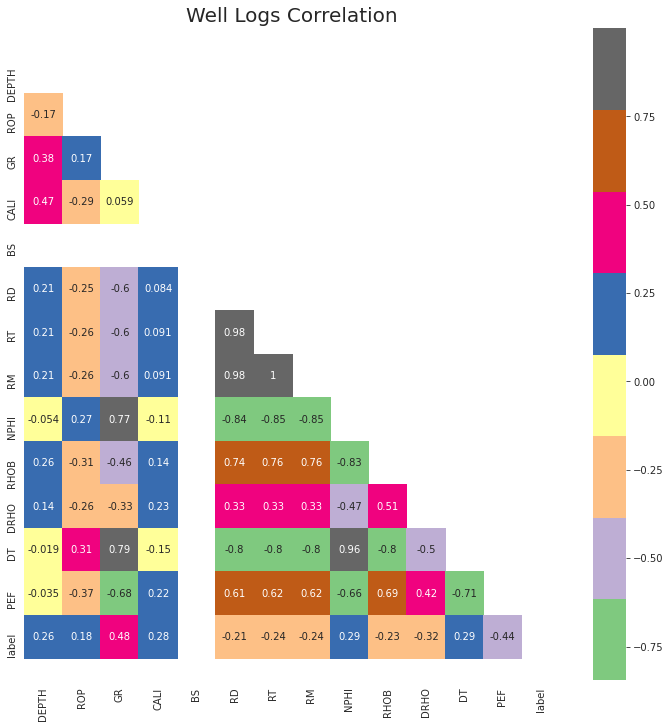

In [ ]:
datacorr = train_df.corr(method='spearman')
def df_corrs(datacorr):
  # Changing correlation matrix shape for masking
  matrix = np.triu(datacorr)


  # Generating heatmap for the data correlation
  plt.figure(figsize=(12,12))
  sns.set_style("whitegrid")
  sns.heatmap(datacorr, annot=True , mask=matrix, cmap='Accent')


  # fix for matplotlib bug that cuts off top/bottom of seaborn visualizations
  bottom, top = plt.ylim() # discover the values for bottom and top
  bottom += 0.5
  top -= 0.5
  plt.ylim(bottom, top) # update the ylim values for bottom and top after addition and subtraction operation

  # changing xtick rotation
  plt.xticks(rotation=90)

  # show ttle
  plt.title("Well Logs Correlation", size=20)

  # show plot
  plt.show()

df_corrs(datacorr)

In [ ]:
def get_redundant_pairs(train_df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = train_df.columns
    for i in range(0, train_df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop


# Function to get top correlations 
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations Dataset1")
print(get_top_abs_correlations(datacorr, 40))


Top Absolute Correlations Dataset1
RT    RM       1.000000
RD    RT       0.999881
      RM       0.999881
NPHI  DT       0.998527
RM    NPHI     0.989024
RT    NPHI     0.989024
RD    NPHI     0.988660
NPHI  RHOB     0.987221
RHOB  DT       0.986807
RM    DT       0.982403
RT    DT       0.982403
RD    DT       0.981843
RM    RHOB     0.973106
RT    RHOB     0.973106
RD    RHOB     0.972040
DT    PEF      0.969672
GR    DT       0.966793
      PEF      0.965085
      NPHI     0.962886
NPHI  PEF      0.959566
RHOB  PEF      0.956288
GR    RT       0.941991
      RM       0.941991
      RD       0.940955
RT    PEF      0.935449
RM    PEF      0.935449
RD    PEF      0.933071
GR    RHOB     0.924903
RHOB  DRHO     0.868425
DRHO  DT       0.865732
      PEF      0.863857
NPHI  DRHO     0.851547
PEF   label    0.822438
GR    DRHO     0.821900
      label    0.821355
RM    DRHO     0.793694
RT    DRHO     0.793694
RD    DRHO     0.790586
DRHO  label    0.765194
ROP   PEF      0.757793
dtype

In [ ]:
keeptrain = train_df.copy()
keeptest = test_df.copy()

In [ ]:
keeptrain.to_csv('train.csv')
keeptest.to_csv('test.csv')

In [ ]:
intersection(train_df.columns, test_df.columns), intersection(test_df.columns, train_df.columns)

(['RD', 'RM', 'label'], [])

In [ ]:
train_df.drop(['DEPTH', 'BS', 'RD', 'ROP', 'RM', 'DRHO'], axis=1, inplace=True)
test_df.drop(['DEPTH', 'BS', 'ROP', 'DRHO'],axis=1,  inplace=True)

In [ ]:
datacorr = train_df.corr(method='spearman')

print("Top Absolute Correlations")
print(get_top_abs_correlations(datacorr, 40))

Top Absolute Correlations
NPHI  DT       0.998733
RT    NPHI     0.994466
NPHI  RHOB     0.991238
RT    DT       0.990051
RHOB  DT       0.989211
GR    PEF      0.984567
RT    RHOB     0.981390
GR    DT       0.973928
DT    PEF      0.969363
GR    NPHI     0.969154
      RT       0.962642
NPHI  PEF      0.960358
RHOB  PEF      0.952709
GR    RHOB     0.945866
RT    PEF      0.944611
PEF   label    0.804154
GR    label    0.779114
RHOB  label    0.698159
RT    label    0.695381
DT    label    0.689789
NPHI  label    0.685847
CALI  DT       0.362583
      NPHI     0.340198
      PEF      0.333372
      RHOB     0.312320
      RT       0.290243
GR    CALI     0.277400
CALI  label    0.081202
dtype: float64


In [ ]:
train_df.shape

(12900, 8)

In [ ]:
test_df.shape

(9000, 7)

In [ ]:
plotcol = ['NPHI', 'RHOB', 'PEF', 'DT', 'CALI', 'GR', 'RT']

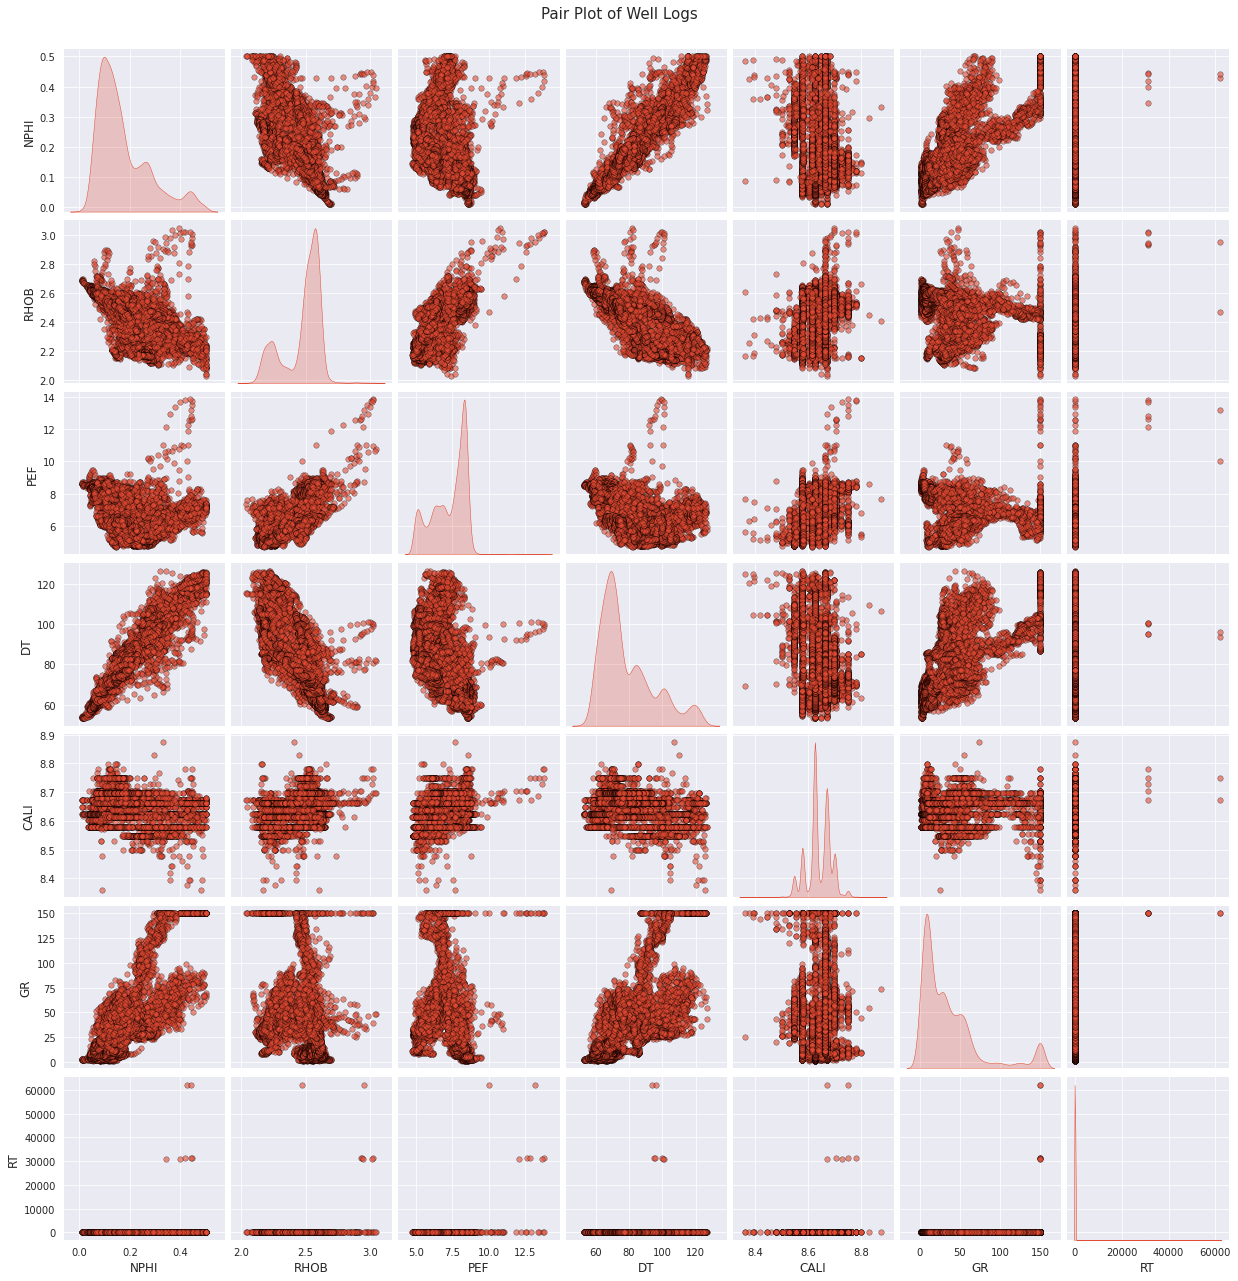

In [ ]:
# Create a pair plot function with a density plot of the 
# diagonal and format the scatter plots.

def df_pairplot(df, cols):
  sns.set_style('darkgrid')
  sns.pairplot(df, vars=cols, diag_kind='kde', palette='mako'
              ,plot_kws = {'alpha': 0.6, 's': 30, 'edgecolor': 'k'})

  # Title 
  plt.suptitle('Pair Plot of Well Logs', size = 15, y=1.02)

df_pairplot(train_df, plotcol)
plt.savefig('pplot')

In [ ]:
# check for Nan Values
train_df.isna().sum()

GR       0
CALI     0
RT       0
NPHI     0
RHOB     0
DT       0
PEF      0
label    0
dtype: int64

In [ ]:
# If Nan, drop
train_df.dropna(inplace=True)

# Logs transformation and preprocessing

In [ ]:
# transform the RT to logarithmic
train_df['RT'] = np.log10(train_df['RT'])
test_df['RT'] = np.log10(test_df['RT'])

In [ ]:
from sklearn.preprocessing import PowerTransformer, StandardScaler
# perform a yeo-johnson transform of the train dataset
ptrain = PowerTransformer(method='yeo-johnson')
train_df_yj = ptrain.fit_transform(train_df.drop('DT', axis=1))

train_df_yj_norm = pd.DataFrame(train_df_yj, columns=train_df.columns.drop('DT'))
y_train = train_df['DT']

In [ ]:
# perform a yeo-johnson transform of the test dataset
ptest = PowerTransformer(method='yeo-johnson')
test_df_yj = ptest.fit_transform(test_df.drop('DT', axis=1))

test_df_yj_norm = pd.DataFrame(test_df_yj, columns=test_df.columns.drop('DT'))

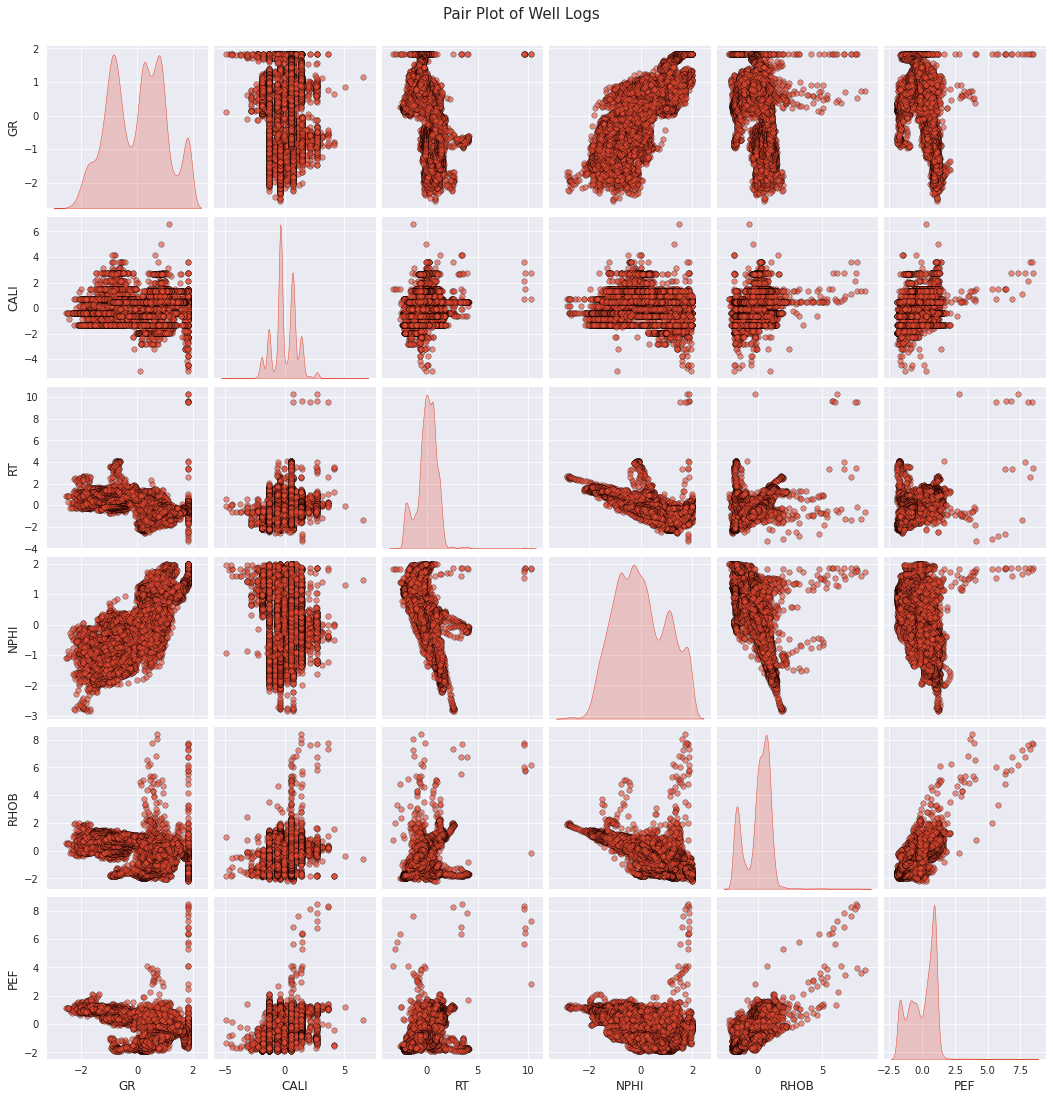

In [ ]:
# a pair plot function with a density plot of the 
# diagonal and format the scatter plots.
df_pairplot(train_df_yj_norm, train_df_yj_norm.columns.drop('label'))

# Outlier detection and removal
https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [ ]:
# Method 1: Isolation Forest
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(train_df_yj_norm)
mask = yhat != -1
train_df_iso = train_df_yj_norm[mask]
y_train_iso = y_train[mask]


# Method 2: Minimum Covariance Determinant
ee = EllipticEnvelope(contamination=0.01)
yhat = ee.fit_predict(train_df_yj_norm)
mask = yhat != -1
train_df_ee = train_df_yj_norm[mask]
y_train_ee = y_train[mask]

# Method 3: Local Outlier Factor
lof = LocalOutlierFactor(contamination=0.2)
yhat = lof.fit_predict(train_df_yj_norm)
mask = yhat != -1
train_df_lof = train_df_yj_norm[mask]
y_train_lof = y_train[mask]

# Method 4: One-class SVM
svm = OneClassSVM(nu=0.13)
yhat = svm.fit_predict(train_df_yj_norm)
mask = yhat != -1
train_df_svm = train_df_yj_norm[mask]
y_train_svm = y_train[mask]


In [ ]:
print('before outliers removed                       :', len(train_df_yj_norm))
print('after outliers removed with Isolation Forest  :', len(train_df_iso))
print('after outliers removed with Min. Covariance   :', len(train_df_ee))
print('after outliers removed with Outlier Factor    :', len(train_df_lof))
print('after outliers removed with One-class SVM     :', len(train_df_svm))

before outliers removed                       : 12900
after outliers removed with Isolation Forest  : 11610
after outliers removed with Min. Covariance   : 12771
after outliers removed with Outlier Factor    : 10320
after outliers removed with One-class SVM     : 11223


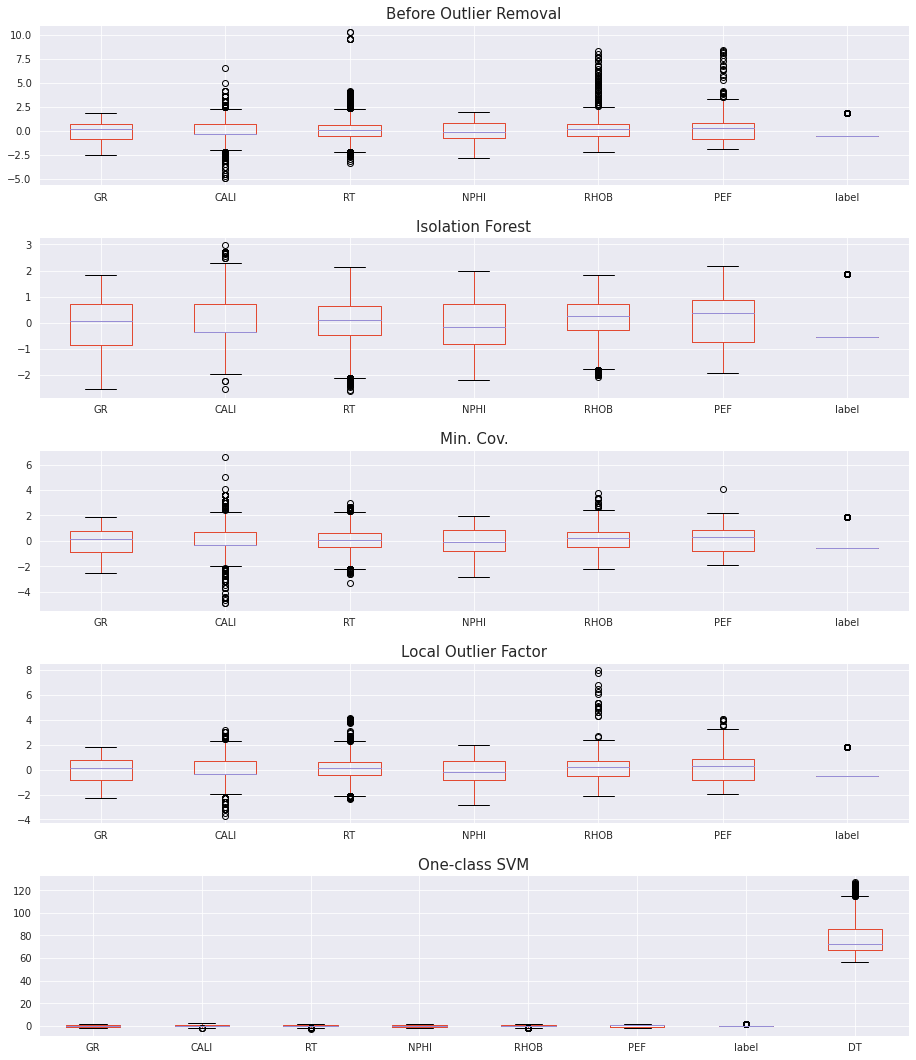

In [ ]:
plt.figure(figsize=(13,15))

plt.subplot(5,1,1)
train_df_yj_norm.boxplot()
plt.title('Before Outlier Removal', size=15)

plt.subplot(5,1,2)
train_df_iso.boxplot()
plt.title('Isolation Forest', size=15)

plt.subplot(5,1,3)
train_df_ee.boxplot()
plt.title('Min. Cov.', size=15)

plt.subplot(5,1,4)
train_df_lof.boxplot()
plt.title('Local Outlier Factor', size=15)

plt.subplot(5,1,5)
train_df_svm.boxplot()
plt.title('One-class SVM', size=15)

plt.tight_layout(1.7)
plt.show()

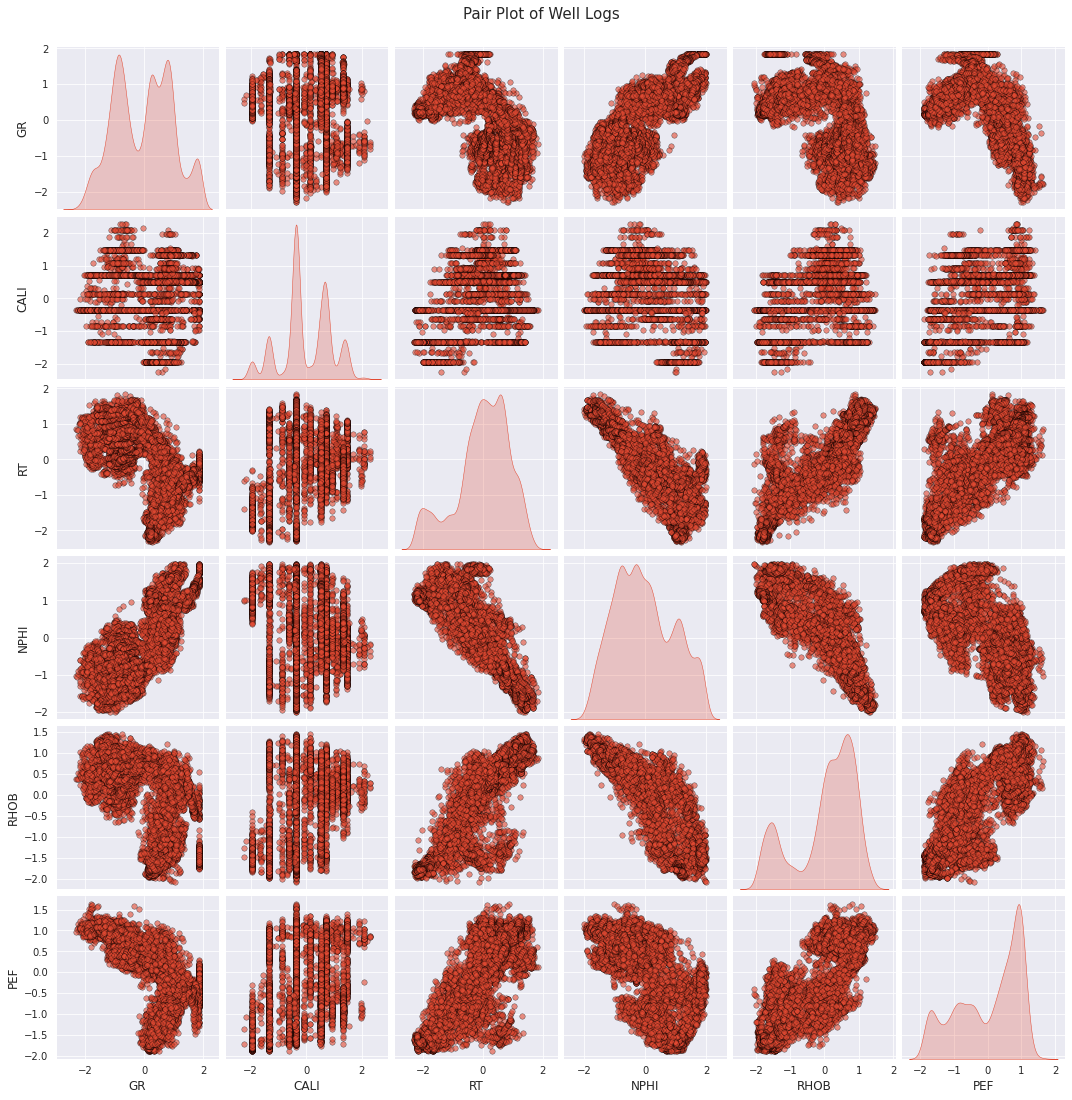

In [ ]:
# a pair plot with a density plot of the 
# diagonal and format the scatter plots.
df_pairplot(train_df_svm, train_df_svm.columns.drop('label'))

In [ ]:
train_df_svm.reset_index(drop=True, inplace=True)
y_train_svm.reset_index(drop=True, inplace=True)

In [ ]:
train_df_svm['DT'] = y_train_svm

In [ ]:
train_df_svm.head()

GR      CALI        RT      NPHI      RHOB       PEF     label      DT
0  0.125676 -1.948485 -1.753597  0.890321 -1.648919 -1.785738 -0.538516  83.764
1  0.094242 -1.948485 -1.741874  0.810981 -1.587936 -1.800322 -0.538516  82.533
2  0.100564 -1.948485 -1.744209  0.744178 -1.537510 -1.808799 -0.538516  81.413
3  0.123552 -1.948485 -1.737222  0.700846 -1.498708 -1.803352 -0.538516  80.262
4  0.161470 -1.948485 -1.725679  0.683161 -1.463496 -1.788173 -0.538516  79.440

In [ ]:
train_df_svm.tail()

GR      CALI        RT  ...       PEF     label       DT
11218  0.932712 -0.628057 -0.711277  ... -1.776222  1.856953  74.9606
11219  1.005197 -1.307553 -0.575343  ... -1.712804  1.856953  76.1212
11220  0.954603  0.920100 -0.580836  ... -1.600844  1.856953  76.6339
11221  0.902642  1.311148 -0.668357  ... -1.527498  1.856953  77.2062
11222  0.819447 -1.323612 -0.786671  ... -1.540350  1.856953  77.4357

[5 rows x 8 columns]

# Modelling

In [ ]:
X_test = test_df_yj_norm
X_train = train_df_svm[train_df_svm['label'] < 0].drop(['label', 'DT'], axis=1)
y_train = train_df_svm[train_df_svm['label'] < 0]['DT']
y_test = test_df['DT']

In [ ]:
X_valid = train_df_svm[train_df_svm['label'] > 0].drop(['label', 'DT'], axis=1)
y_valid = train_df_svm[train_df_svm['label'] > 0]['DT']

In [ ]:
len(X_train)

9027

In [ ]:
pip install catboost

     |████████████████████████████████| 65.8MB 64kB/s 


In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor

In [ ]:
model = ExtraTreesRegressor(n_estimators=800, max_depth=6, random_state=21)
model2=CatBoostRegressor(n_estimators=800,max_depth=6,learning_rate=0.08)
model3 = RandomForestRegressor(n_estimators=800, max_depth=10, random_state=21)

In [ ]:
def train_model(model):
  # Fit the regressor to the training data
  model.fit(X_train, y_train)
  
  score = model.score(X_valid, y_valid)
  return model, "R-squared of the Well: {}".format(score)

In [ ]:
model, etr2score = train_model(model)
model2, cbr2score = train_model(model2)
model3, rfr2score = train_model(model3)

0:	learn: 14.2908617	total: 4.03ms	remaining: 3.22s
1:	learn: 13.2881135	total: 7.63ms	remaining: 3.05s
2:	learn: 12.3661774	total: 10.8ms	remaining: 2.87s
3:	learn: 11.5325594	total: 13.8ms	remaining: 2.75s
4:	learn: 10.7575952	total: 16.9ms	remaining: 2.69s
5:	learn: 10.0427712	total: 20.2ms	remaining: 2.67s
6:	learn: 9.3987072	total: 23.2ms	remaining: 2.63s
7:	learn: 8.8046596	total: 26.2ms	remaining: 2.59s
8:	learn: 8.2552478	total: 29.2ms	remaining: 2.57s
9:	learn: 7.7703647	total: 32.3ms	remaining: 2.55s
10:	learn: 7.3221507	total: 35.2ms	remaining: 2.53s
11:	learn: 6.9085664	total: 38.2ms	remaining: 2.51s
12:	learn: 6.5407177	total: 41ms	remaining: 2.48s
13:	learn: 6.2037420	total: 44ms	remaining: 2.47s
14:	learn: 5.8872531	total: 46.9ms	remaining: 2.46s
15:	learn: 5.6197946	total: 49.8ms	remaining: 2.44s
16:	learn: 5.3774492	total: 52.7ms	remaining: 2.43s
17:	learn: 5.1482689	total: 55.8ms	remaining: 2.42s
18:	learn: 4.9470679	total: 58.7ms	remaining: 2.41s
19:	learn: 4.7663414

In [ ]:
print(etr2score)
print(" ")
print(cbr2score)
print(" ") 
print(rfr2score)

R-squared of Well 3: 0.8627265006476755
 
R-squared of Well 3: 0.8478231788049108
 
R-squared of Well 3: 0.8553346775144511


In [ ]:
def predict_model(model):
  # Predict on well 3
  y_pred = model.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  return y_pred, "RMSE of Well 3: {}".format(rmse)

In [ ]:
y_pred, etrmse = predict_model(model)
y_pred2, cbrmse= predict_model(model2)
y_pred3, rfrmse = predict_model(model3)

In [ ]:
print(etrmse)
print(" ")
print(cbrmse)
print(" ") 
print(rfrmse)

RMSE of Well 3: 4.892887853779245
 
RMSE of Well 3: 4.796418309743107
 
RMSE of Well 3: 4.82932645279462


Using the whole tain data

In [ ]:
X_train = train_df_svm.drop(['label', 'DT'], axis=1)
y_train = train_df_svm['DT']

In [ ]:
def train_model(model):
  # Fit the regressor to the training data
  model.fit(X_train, y_train)
  
  score = model.score(X_test, y_test)
  return model, "R-squared of the Well: {}".format(score)

In [ ]:
model, etr2score = train_model(model)
model2, cbr2score = train_model(model2)
model3, rfr2score = train_model(model3)

0:	learn: 14.3479598	total: 4.42ms	remaining: 3.54s
1:	learn: 13.3300263	total: 8.4ms	remaining: 3.35s
2:	learn: 12.4102547	total: 12.5ms	remaining: 3.33s
3:	learn: 11.5659324	total: 16.4ms	remaining: 3.26s
4:	learn: 10.8041815	total: 20.1ms	remaining: 3.19s
5:	learn: 10.0969973	total: 23.7ms	remaining: 3.14s
6:	learn: 9.4465909	total: 27.3ms	remaining: 3.1s
7:	learn: 8.8447422	total: 31.1ms	remaining: 3.08s
8:	learn: 8.2938777	total: 34.6ms	remaining: 3.04s
9:	learn: 7.7991135	total: 38.2ms	remaining: 3.02s
10:	learn: 7.3448429	total: 41.8ms	remaining: 3s
11:	learn: 6.9310376	total: 45.3ms	remaining: 2.97s
12:	learn: 6.5585189	total: 48.7ms	remaining: 2.95s
13:	learn: 6.2185802	total: 52.2ms	remaining: 2.93s
14:	learn: 5.9098696	total: 55.7ms	remaining: 2.91s
15:	learn: 5.6396617	total: 59.2ms	remaining: 2.9s
16:	learn: 5.3992600	total: 62.8ms	remaining: 2.89s
17:	learn: 5.1739605	total: 66.3ms	remaining: 2.88s
18:	learn: 4.9740896	total: 69.9ms	remaining: 2.87s
19:	learn: 4.7917406	t

In [ ]:
print(etr2score)
print(" ")
print(cbr2score)
print(" ") 
print(rfr2score)

R-squared of the Well: 0.8694237377168511
 
R-squared of the Well: 0.8861358560610368
 
R-squared of the Well: 0.872972895276063


In [ ]:
y_pred, etrmse = predict_model(model)
y_pred2, cbrmse= predict_model(model2)
y_pred3, rfrmse = predict_model(model3)

In [ ]:
print(etrmse)
print(" ")
print(cbrmse)
print(" ") 
print(rfrmse)

RMSE of Well 3: 4.792964718302211
 
RMSE of Well 3: 4.4757478152426575
 
RMSE of Well 3: 4.727377843794288


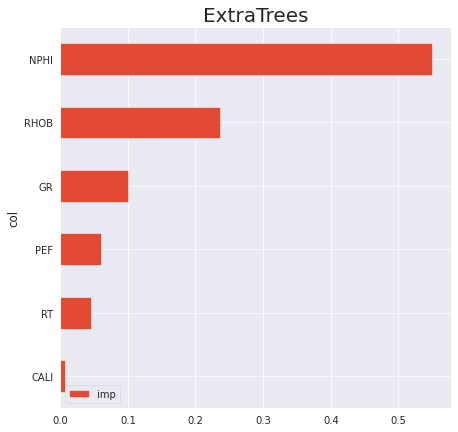

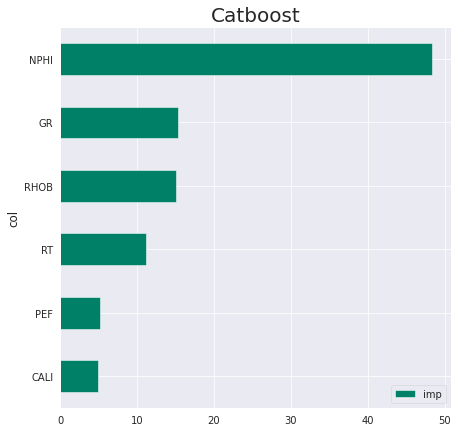

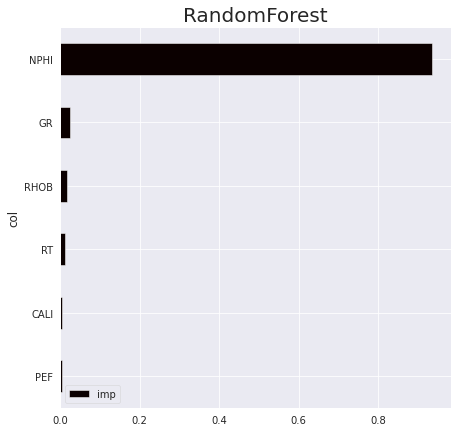

In [ ]:
fea_imp = pd.DataFrame({'imp':model.feature_importances_, 'col': X_train.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(7, 7))
plt.title("ExtraTrees", size=20)
plt.savefig('featimp1')

fea_imp = pd.DataFrame({'imp':model2.feature_importances_, 'col': X_train.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(7, 7), colormap='summer')
plt.title("Catboost", size=20)
plt.savefig('featimp2')

fea_imp = pd.DataFrame({'imp':model3.feature_importances_, 'col': X_train.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(7, 7), colormap='hot')
plt.title("RandomForest", size=20)
plt.savefig('featimp3')

plt.show()

# Saving and Visualizing predictions

In [ ]:
keeptest['ET_pred'] = y_pred
keeptest['CAT_pred'] = y_pred2
keeptest['RF_pred'] = y_pred3

**DT is the actual sonic log and the rest are the predictions**

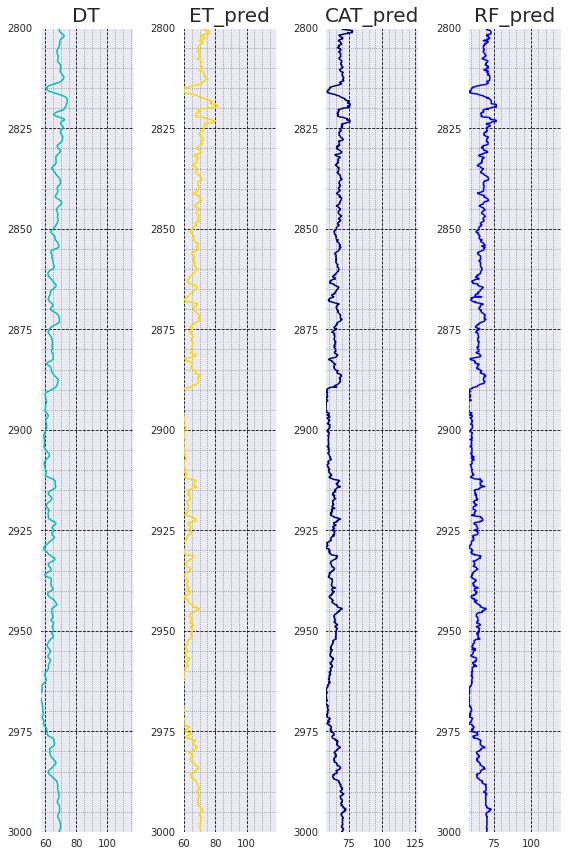

In [ ]:
formation_eval1.doub_logplot(keeptest, logs=['DT', 'ET_pred', 'CAT_pred', 'RF_pred'], \
                             min_depth=2800, max_depth=3000,\
                             plotsize=(8,12))
plt.savefig('preddt')

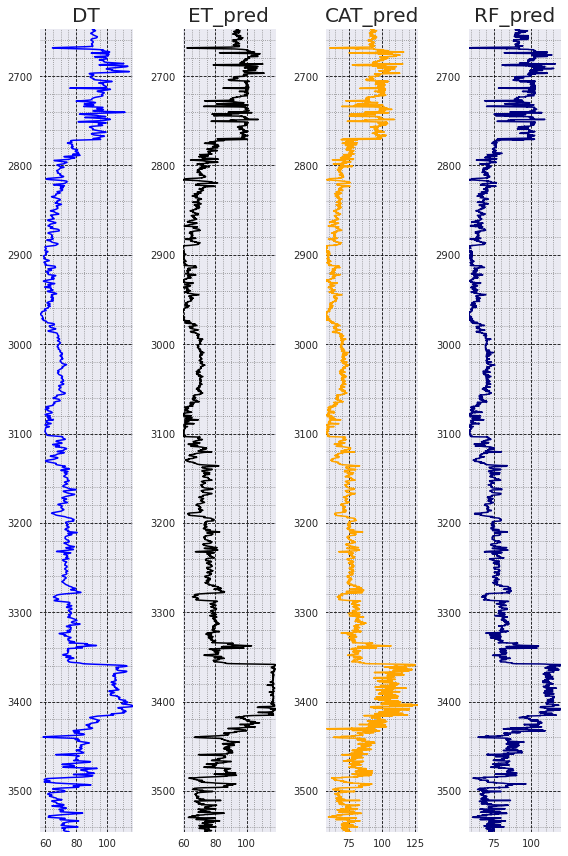

In [ ]:
formation_eval1.doub_logplot(keeptest, logs=['DT', 'ET_pred', 'CAT_pred', 'RF_pred'], \
                             plotsize=(8,12))
plt.savefig('preddt2')

In [ ]:
def pickle_model(model, pickle_name):
  f = open(pickle_name, 'wb')
  pickle.dump(model, f)
  f.close()

In [ ]:
import pickle

In [ ]:
#pickle_model(model, 'et.pickle')